# Markowitz Portfolio Optimization with Monte Carlo Simulation

In 1952, Harry Markowitz published his paper "Portfolio Selection," which proved the existence of an efficient set of portfolios that maximizes the expected return and simultaneously reduces the volatility(risk). One of the important highlights of his work is that investments in multiple securities should not be analyzed separately but should be analyzed in a portfolio. Investors must understand how different securities interact with each other. Assuming investors are rational and risk-averse, investors can optimize returns without assuming additional risk through the combination of securities of low correlation. Using Monte Carlo method, we randomly assign a weight to each security in our portfolio, then calculate its mean return and standard deviation of return (volatility). This allows us to calculate the Sharpe ratio for thousands of randomly selected allocations. We can then plot the allocations on a chart showing return vs. volatility, colored by Sharpe ratio. The chart shows us the Markowitz Efficient Frontier.

## Data Preprocesing

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#specify start and end date
start = '2010-1-1'
end = '2016-1-1'

In [5]:
#import financial data -adjusted daily close price
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [6]:
#join data together
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [7]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
stocks.tail()

,aapl,cisco,ibm,amzn
Date,,,,
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13
2016-12-29,115.755990,29.662760,163.682078,765.15
2016-12-30,114.853583,29.429042,163.082762,749.87


## Exploratory Data Analysis
We normalize our price data and plot it to get an overview.

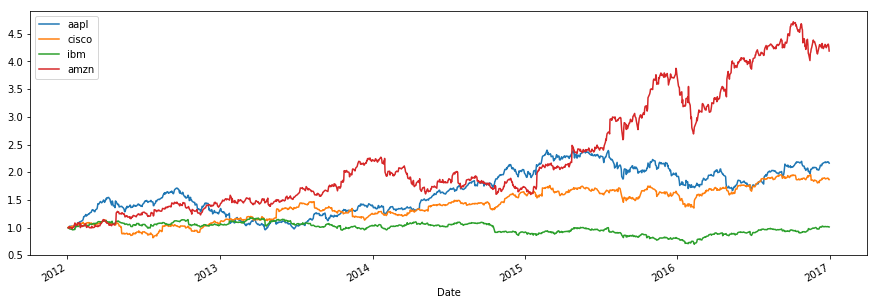

In [6]:
#nomalize and plot
(stocks/stocks.iloc[0]).plot(figsize=(15,5))

In [7]:
#calculate logarithmic rate of return
stocks_returns = np.log(stocks/stocks.shift(1))

In [8]:
stocks_returns.tail()

,aapl,cisco,ibm,amzn
Date,,,,
2016-12-23,0.001976,0.002295,-0.002097,-0.007531
2016-12-27,0.006331,0.004901,0.002576,0.014113
2016-12-28,-0.004273,-0.008511,-0.005700,0.000946
2016-12-29,-0.000257,0.001314,0.002464,-0.009081
2016-12-30,-0.007826,-0.007910,-0.003668,-0.020172


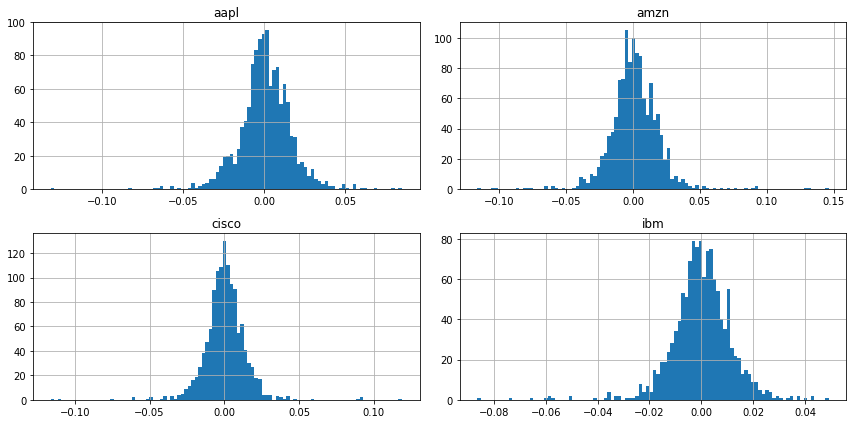

In [9]:
#plot histogram of log returns
stocks_returns.hist(bins=100,figsize=(12,6))
plt.tight_layout();

In [10]:
stocks_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [11]:
#obtain annual returns
stocks_annual_returns = stocks_returns.mean() * 252
stocks_annual_returns

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [12]:
#obtain covariance of stock returns
stocks_returns.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [13]:
#obtain covariance of annual stock returns
stocks_returns.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


## Monte Carlo Simulation for Allocation of Stocks

In [15]:
# Number of Iterations
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights - sum of all weights equalto 1
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((stocks_returns.mean() * weights) *252)

    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(stocks_returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [21]:
all_weights

array([[0.43080316, 0.02803206, 0.29290875, 0.24825603],
       [0.0011273 , 0.66311244, 0.28385734, 0.05190293],
       [0.32992151, 0.2301621 , 0.12151522, 0.31840117],
       ...,
       [0.22099896, 0.27261363, 0.47722323, 0.02916418],
       [0.48039374, 0.4983992 , 0.01965258, 0.00155449],
       [0.26597268, 0.24829504, 0.23315021, 0.25258207]])

In [26]:
max_sharpe = sharpe_arr.argmax()
max_sharpe

14444

In [27]:
all_weights[max_sharpe,:]

array([0.28360242, 0.22348536, 0.00058068, 0.49233155])

In [30]:
max_sr_ret = ret_arr[max_sharpe]
max_sr_vol = vol_arr[max_sharpe]

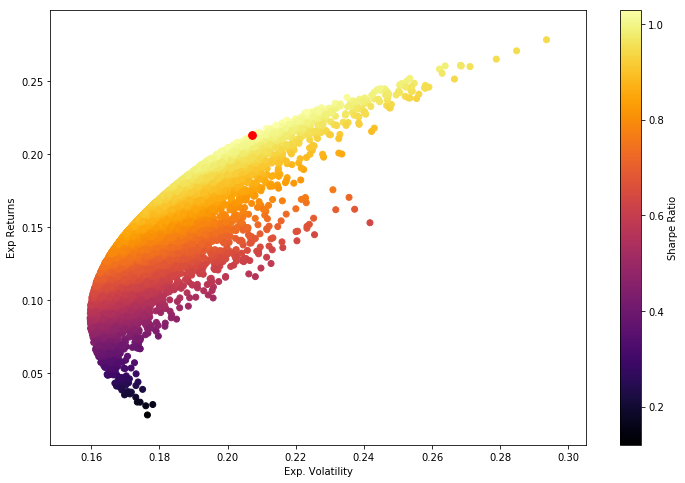

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='inferno')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Exp. Volatility')
plt.ylabel('Exp Returns')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=60)

# Conclusion & Future Research

As shown in the chart, we successfully constructed the Markowitz Efficient Frontier with Monte Carlo simulation. In the future, it would be interesting to explore a portfolio of both traditional assets (securities and bonds) and crytocurrencies. This may be promising as the common notion is that the cryptocurrency market is uncoupled with traditional markets, which makes it suitable for Markowitz optimization model.

